# Machine Lernining Part 1

In [16]:
import tensorflow as tf
import numpy as np
print("TF:", tf.__version__)

TF: 2.20.0


**This section shows how TensorFlow represents scalars, vectors, matrices, and tensors.**
Each example shows a different tensor rank and its corresponding shape.
*The printed shapes illustrate how it is stored in TensorFlow.*

In [17]:
# 1) Scalars, vectors, matrices, tensors
scalar = tf.constant(7) # rank-0
vector = tf.constant([10, 20, 30]) # rank-1
matrix = tf.constant([[1., 2.], [3., 4.]]) # rank-2
tensor = tf.constant([[[1],[2]], [[3],[4]]]) # rank-3 (2x2x1)
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)

() (3,) (2, 2) (2, 2, 1)


**TensorFlow assigns default data types to tensors.**
*Casting is used to change data types for compatibility and precision control.*

In [18]:
# 2) Dtypes and casting
x = tf.constant([1.7, 7.4]) # float32 default
y = tf.constant([7, 10]) # int32 default
x16 = tf.cast(x, tf.float16) # reduced precision floats
y32 = tf.cast(y, tf.float32) # cast ints → floats

### Tensor indexing and shape manipulation.
*Dimensions can be added or removed to match required tensor formats.*

In [19]:
# 3) Indexing and shaping
rank2 = tf.constant([[10, 7], [3, 4]])
last_col = rank2[:, -1] # column slice
expanded = tf.expand_dims(rank2, -1) # add channel-like axis
squeezed = tf.squeeze(expanded, axis=-1)

### Basic tensor operations and broadcasting.
- Matrix multiplication, aggregations, and one-hot encoding (index → binary vector).
- Adding 10 and multiplying by 2 are applied to every element in the matrix.
- The min, max, mean, and sum values summarize the random tensor into single numbers.


In [20]:
# 4) Broadcasting & basic ops
A = tf.constant([[10., 7.], [3., 4.]])
print("A+10:\n", A + 10)
print("A*2:\n", A * 2)
# 5) Matrix multiplication rules (inner dims match)
X = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32) # (3x2)
Y = tf.constant([[7, 8], [9, 10], [11, 12]], dtype=tf.float32) # (3x2)
XtY = tf.matmul(X, tf.transpose(Y)) # (3x2) @ (2x3) -> (3x3)
# 6) Aggregations
E = tf.constant(np.random.randint(0, 100, size=10))
print("min:", tf.reduce_min(E).numpy(),
"max:", tf.reduce_max(E).numpy(),
"mean:", tf.reduce_mean(tf.cast(E, tf.float32)).numpy(),
"sum:", tf.reduce_sum(E).numpy())
# 7) One-hot encoding
idx = tf.constant([0, 1, 2, 3])
oh = tf.one_hot(idx, depth=4)

A+10:
 tf.Tensor(
[[20. 17.]
 [13. 14.]], shape=(2, 2), dtype=float32)
A*2:
 tf.Tensor(
[[20. 14.]
 [ 6.  8.]], shape=(2, 2), dtype=float32)
min: 4 max: 87 mean: 40.5 sum: 405


**Converting a NumPy array to a TensorFlow tensor and back.**

In [21]:
# 8) NumPy interop
arr = np.array([3., 7., 10.])
t = tf.constant(arr) # NumPy -> Tensor
back_to_np = t.numpy() # Tensor -> NumPy
print("OK")

OK


### Simple Linear Regression Model

Test MAE: 16.350627899169922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


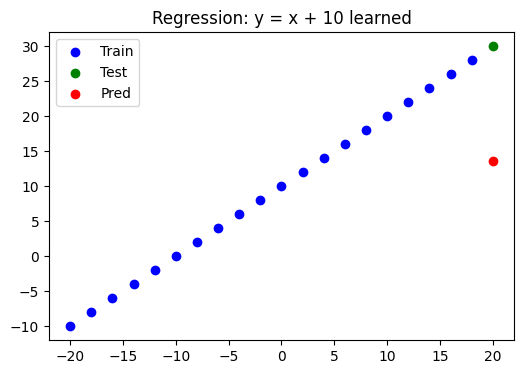

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Synthetic linear data
X = np.arange(-20, 21, 2, dtype=np.float32) # np.arange(start, stop, step) means: “Start at -20, keep adding 2, stop before 21” 
                                            # dtype=np.float32 just means:“Store these numbers as decimal numbers (floats), not integers”
y = X + 10                                  # Take each number in X and add 10 to it. 
                                            # So if X is [-20, -18, ..., 18, 20], then y will be [-10, -8, ..., 28, 30].
                                            # X is our input data (features), and y is our target data (Correct values) that we want to predict.
                                            # Why we do this?
                                            # We are not teaching the model the rule.
                                            # We are only giving it examples:
                                            # “When the input is -20, the correct answer is -10”
                                            # “When the input is 0, the correct answer is 10”
                                            # “When the input is 20, the correct answer is 30”
                                            # The model must figure out the pattern by itself.

# Train/test split (simple)                  Why?  Think of this like school:

                                            # Training data = practice questions + answers
                                            # Test data = exam questions
                                            # If you practice with the exam answers, the exam means nothing.
X_train, y_train = X[:20], y[:20]           # the first 20 examples for training (practice)
X_test, y_test = X[20:], y[20:]             # the last 20 examples for testing (exam)

# 1) CREATE # Setup the calculator (model) layers / Initialize the model
model = tf.keras.Sequential([               # means data will flow through these layers in order, one after the other. input → layer → output
tf.keras.layers.Input(shape=(1,)),          # Each input sample contains exactly one number (the x value).TensorFlow needs this to build weights matrices and avoid shape errors
tf.keras.layers.Dense(1)                    # This creates one neuron.
                                            # That neuron does exactly this math: output=(weight×input)+bias
])


# 2) COMPILE                                 # Decide how learning should work by choosing a loss function and an optimizer
model.compile(
loss="mae",                                 # Loss = how wrong the prediction is. Mean Absolute Error. It calculates |prediction − correct answer| 
                                            # for each example, then averages those errors across all examples. The model will try to minimize this number.
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Optimizer changes the weight and bias to reduce loss. Stochastic Gradient Descent (SGD) 
metrics=["mae"]                                         # Metrics is just for displaying the loss value during training. The learning rate controls how large each weight update is during training
)                                  

                    
# 3) FIT                                                # Practice using the training examples and improve the weight and bias.
                                                        # Learning and training happens here. The model looks at the training data, makes predictions, compares them to the correct answers, and updates its weights to get better.
history = model.fit(X_train, y_train, epochs=200, verbose=0) # silent training, epochs is how many times to loop over data

# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", mae)

# Predict and visualize
y_pred = model.predict(X_test).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_pred, c='r', label='Pred')
plt.legend(); plt.title("Regression: y = x + 10 learned")
plt.show()

**The model learns a linear trend, but it does not match the true relationship y = x + 10.**
*Because the training data is limited, the model does not adjust its weights accurately, resulting in higher error.*

### Non-linear Binary classification data using circular patterns.

- A neural network with non-linear layers is trained to separate the classes.
- The model achieved perfect test accuracy and learned a curved decision boundary that matches the data.

**Important Points**
- ReLU → allows curved boundary.

- Sigmoid → gives probability.

- Binary crossentropy → correct loss for binary.

- Adam → updates weights.

- Train on train set.

- Evaluate on test set.

Test accuracy: 1.000


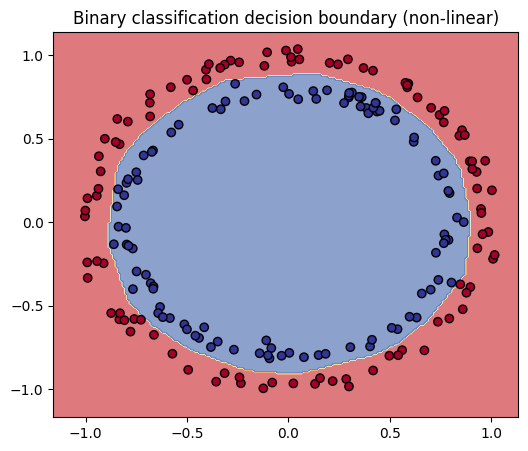

In [ ]:
# import tools for non-linear data
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split                     # HELPER: This is a function that helps us split our data into training and testing sets.


# Non-linear separable data                                
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)         # Makes 1000 examples of points in a circle pattern, with some noise added.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # Split 20% of the data for testing, and the rest for training
random_state=42)  # Random state makes the results reproducible. If you run this code multiple times, you'll get the same train/test split each time.

# 1) CREATE (use non-linear activations + sigmoid output)
model = tf.keras.Sequential([                                 # Starts building a neural network model.
tf.keras.layers.Input(shape=(2,)),                            # Each input sample contains exactly two numbers (the x and y coordinates of a point).
tf.keras.layers.Dense(16, activation="relu"),                 # A hidden layer with 16 neurons and ReLU activation. ReLU stands for Rectified Linear Unit, This allows the model to learn non-linear patterns.
tf.keras.layers.Dense(16, activation="relu"),                 # Another hidden layer with 16 neurons and ReLU activation. This gives the model more capacity to learn complex patterns.                    
tf.keras.layers.Dense(1, activation="sigmoid")                # The output layer has 1 neuron with sigmoid activation. This means the model will output a number between 0 and 1, which can be interpreted as a probability of belonging to class 1 (the outer circle).
])

# 2) COMPILE                                                 # Decide how learning should work by choosing a loss function and an optimizer
model.compile(                                               # Loss = how wrong the prediction is. Binary Crossentropy is used for binary classification problems.
loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),      # Optimizer changes the weight and bias to reduce loss. Adam is an advanced optimizer that often works well for many problems.
metrics=["accuracy"]                                         # Metrics is just for displaying the accuracy value during training. 

# 3) FIT
history = model.fit(X_train, y_train, epochs=25, verbose=0)  # Train the model 25 times (epochs) using the training data. The model will adjust its weights to minimize the loss on the training data.

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)        # Test the model on the unseen test data to see how well it generalizes. It will get  loss and accuracy on the test set.
print(f"Test accuracy: {acc:.3f}")                           # Print the test accuracy.


# Visualize decision boundary

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 200), # Creates grid for backgrouund.
np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]                       # Combines grid into list of x,y points
probs = model.predict(grid, verbose=0).reshape(xx.shape)   # Reshape the predictions to match the grid shape for contour plotting
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs>0.5).astype(int), cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("Binary classification decision boundary (non-linear)")
plt.show()

### Multiclass Classification With Fashion-MNIST 

- Images are loaded and scaled to values between 0 and 1.
*A basic neural network is defined to classify images into 10 categories.*

**The model is trained and evaluated.**
- Accuracy shows how many images are classified correctly.
- Predicted class indices represent the category the model is most confident about for each image, such as the ankle boot.

**Important Points**
- Normalize → improves learning
- Flatten → convert image to 1D
- ReLU → adds non-linearity
- Softmax → gives class probabilities
- Sparse categorical crossentropy → correct loss for integer labels
- Argmax → converts probabilities to class
- Validation splits checks for over-fitting

Test accuracy: 0.8745999932289124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


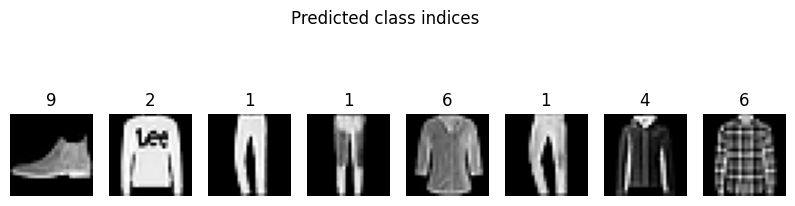

In [ ]:
import tensorflow as tf                    # Builds NN models and layers
import numpy as np                         # Numerical computing and array manipulation
import matplotlib.pyplot as plt            # 
        
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # 

# Normalize to [0,1]                       # Pixel values in the original dataset are integers from 0 to 255. Dividing by 255.0 scales them to be between 0 and 1, which often helps neural networks train faster and perform better.
x_train = x_train.astype("float32")/255.0  
x_test = x_test.astype("float32")/255.0       

# 1) CREATE (flatten > Dense ReLU > Dense softmax)   
model = tf.keras.Sequential([                       # Starts building a neural network model.
tf.keras.layers.Input(shape=(28, 28)),              # Each input sample is a 28x28 pixel image.
tf.keras.layers.Flatten(),                          # Converts the 2D 28x28 image into a 1D array of 784 pixels. This allows us to feed the pixel values into a Dense layer.
tf.keras.layers.Dense(128, activation="relu"),      # A hidden layer with 128 neurons and ReLU activation. This allows the model to learn complex patterns in the data.
tf.keras.layers.Dense(10, activation="softmax")     # The output layer has 10 neurons (one for each class) with softmax activation. 
])

# 2) COMPILE
model.compile(   
loss="sparse_categorical_crossentropy",  # Used for multi-class classification problems where labels are integers (not one-hot encoded). 
optimizer="adam",                        # Optimizer changes the weight and bias to reduce loss. 
metrics=["accuracy"]                     # Metrics is just for displaying the accuracy value during training.
)

# 3) FIT
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0) # Train the model for 10 epochs, using 10% of the training data for validation. The model will adjust its weights to minimize the loss on the training data, and it will also report validation performance after each epoch.

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)       # Test the model on the unseen test data to see how well it generalizes. It will get loss and accuracy on the test set.
print("Test accuracy:", acc)

# Show a few preds
preds = model.predict(x_test[:8]).argmax(axis=1)     # Predicts the first 8 test images, argmax chooses the class with the highest probability for each image. Softmax give probabilities for each class, argmax picks the class with the highest probability.
plt.figure(figsize=(10,3))
for i in range(8):
	plt.subplot(1,8,i+1)
	plt.imshow(x_test[i], cmap='gray')
	plt.title(int(preds[i]))
	plt.axis('off')
plt.suptitle("Predicted class indices"); plt.show()


### Fashion-MNIST is reduced to two classes to create a binary classification task.
- A small CNN is trained to distinguish between ankle boots and sneakers.
- The model achieves high test accuracy, showing it can separate the two classes well.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Use Fashion-MNIST but map 2 classes to a binary task (e.g., class 9=Ankle boot vs 7=Sneaker)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Keep only classes 7 and 9 becomes a bianry classification.
train_mask = np.isin(y_train, [7, 9])
test_mask = np.isin(y_test, [7, 9])
x_train = x_train[train_mask][..., None]/255.0          # Keep only the images of classes 7 and 9, add a channel dimension (for CNN), and normalize pixel values to [0,1].
y_train = (y_train[train_mask] == 9).astype(np.float32) # converts labels to 1 if class 9 (Ankle boot) and 0 if class 7 (Sneaker). This creates a binary classification problem where the model will learn to distinguish between these two classes.
x_test = x_test[test_mask][..., None]/255.0   
y_test = (y_test[test_mask] == 9).astype(np.float32)

# 1) CREATE (small CNN) 
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(28,28,1)),   # input Image and 1 channel (grayscale)
tf.keras.layers.Conv2D(16, 3, activation="relu"),  # A convolutional layer with 16 filters, a kernel size of 3x3, and ReLU activation. Learns small patterns in the images (like edges).
tf.keras.layers.MaxPool2D(),                       # Max pool reduces image size, keeps strongest features and make model more robust.
tf.keras.layers.Conv2D(32, 3, activation="relu"), 
tf.keras.layers.MaxPool2D(),                        # Downsample again and learn more complex patterns.
tf.keras.layers.Flatten(),                          # Converts 3D feature maps into 1D feature vector so it can be fed into Dense layers.
tf.keras.layers.Dense(64, activation="relu"),       # Fully connected layer with 64 neurons, combine extracted features to learn higher level patterns.
tf.keras.layers.Dense(1, activation="sigmoid")      # Output 1 neuron with sigmoid activation for binary classification (output is probability of being class 1).
]) 
# 2) COMPILE
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)
# 3) FIT
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0) # Train the model for 5 epochs, using 10% of the training data for validation.
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

Test accuracy: 0.9725000262260437


### CIFAR-10 data is filtered to three classes and normalized.
- A small convolutional neural network is trained for multi-class image classification.
- Test accuracy shows how well the CNN generalizes to unseen images.

In [29]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Keep classes 0,1,2 only
mask_train = (y_train < 3).flatten()
mask_test = (y_test < 3).flatten()
x_train = x_train[mask_train].astype("float32")/255.0
y_train = y_train[mask_train].flatten()
x_test = x_test[mask_test].astype("float32")/255.0
y_test = y_test[mask_test].flatten()

# Small CNN model
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation="relu"),
	tf.keras.layers.Dense(3, activation="softmax")
])
model.compile(
	loss="sparse_categorical_crossentropy",
	optimizer="adam",
	metrics=["accuracy"]
)
# Train
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=64,
validation_split=0.1,
verbose=1
)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy (tiny CNN):", acc)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7386 - loss: 0.6231 - val_accuracy: 0.8307 - val_loss: 0.4402
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8398 - loss: 0.4029 - val_accuracy: 0.8813 - val_loss: 0.3253
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8745 - loss: 0.3255 - val_accuracy: 0.8880 - val_loss: 0.3056
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8962 - loss: 0.2725 - val_accuracy: 0.9020 - val_loss: 0.2664
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9084 - loss: 0.2368 - val_accuracy: 0.9007 - val_loss: 0.2707
Test accuracy (tiny CNN): 0.8883333206176758


*Convolutional neural networks can learn visual patterns directly from images.*